In [37]:
import numpy as np
import pandas as pd

In [38]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.1 MB/s eta 0:00:00


In [39]:
df1 = pd.read_csv('hr_app_employees.csv')
df2 = pd.read_csv('hr_app_employeeskills.csv')

/tmp/ipython-input-1016988800.py:1: DtypeWarning: Columns (14,17,41,63,67,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('hr_app_employees.csv')


In [40]:
df2['skills_id'].duplicated().sum()

np.int64(10647)

In [41]:
df2.head()

,id,comitted_production_per_hour,hired_for_this,remarks,employee_id,skills_id,process_id,efficiency,smv
0,15,90,yes,NaN,9842,8.0,44.0,NaN,0.0
1,16,60,yes,NaN,9842,8.0,6.0,NaN,0.0
2,17,100,yes,NaN,9842,8.0,7.0,NaN,0.0
3,18,120,yes,NaN,9846,12.0,97.0,NaN,0.0
4,19,140,yes,NaN,9846,8.0,97.0,NaN,0.0


In [42]:
import pandas as pd


df_employee_skills = df2.groupby('employee_id').agg({
    'skills_id': lambda x: list(x)
}).reset_index()


df_employee_skills.columns = ['employee_id', 'skills_list']

In [43]:
df_employee_skills.head()

,employee_id,skills_list
0,19,[294.0]
1,103,"[86.0, 86.0]"
2,104,"[86.0, 86.0]"
3,105,"[86.0, 86.0, 86.0, 86.0, 86.0]"
4,109,"[86.0, 86.0]"


In [44]:
df_merged = df_merged = df1.merge(
    df_employee_skills,
    left_on='id',
    right_on='employee_id'
)

In [45]:
df_merged.columns

Index(['id', 'name_en', 'name_bn', 'father_name_en', 'father_name_bn',
       'mother_name_en', 'mother_name_bn', 'spouse_name', 'gender',
       'marital_status', 'blood_group', 'over_time', 'birth_date', 'age',
       'nid', 'nationality', 'mobile', 'email', 'present_area_name',
       'present_house_no', 'present_road_no', 'present_sector_no',
       'present_section_no', 'present_PostOffice', 'permanent_area_name',
       'permanent_house_no', 'permanent_road_no', 'permanent_sector_no',
       'permanent_section_no', 'permanent_PostOffice', 'employee_code',
       'auto_employee_code', 'emplyment_status', 'joining_date', 'grade',
       'gross_salary', 'basic', 'emergency_contact_no',
       'emergency_contact_address', 'bank_ac', 'bank_name',
       'committed_operation', 'comitted_production_per_hour', 'image',
       'auto_increment_code', 'branch_id', 'department_id', 'designation_id',
       'leave_approver_id', 'mother_organization_id', 'permanent_district_id',
       'perman

In [46]:
df_merged = df_merged[['id','gender','over_time','emplyment_status','grade','gross_salary','branch_id','department_id','salary_mode','duty_mode','skills_list','designation_id']]

In [47]:
df_merged.columns

Index(['id', 'gender', 'over_time', 'emplyment_status', 'grade',
       'gross_salary', 'branch_id', 'department_id', 'salary_mode',
       'duty_mode', 'skills_list', 'designation_id'],
      dtype='object')

In [48]:
df_merged.isna().sum()

,0
id,0
gender,0
over_time,0
emplyment_status,0
grade,204
gross_salary,0
branch_id,0
department_id,0
salary_mode,0
duty_mode,0


In [49]:
df_merged.shape

(5261, 12)

In [50]:
df_merged['gender'].unique()

array(['male', 'female'], dtype=object)

In [51]:



df_merged['gender'] = df_merged['gender'].str.strip().str.lower()

gender_map = {
    'female': 'Female',
    'famale': 'Female',
    'femel': 'Female',
    'male': 'Male',
    'Male'.lower(): 'Male',
    'others': 'Others'
}

df_merged['gender'] = df_merged['gender'].map(gender_map)
df_merged = df_merged.dropna(subset=['gender'])



print(df_merged.isna().sum())

id                    0
gender                0
over_time             0
emplyment_status      0
grade               204
gross_salary          0
branch_id             0
department_id         0
salary_mode           0
duty_mode             0
skills_list           0
designation_id        0
dtype: int64


In [52]:
df_merged.shape

(5261, 12)

In [53]:
df_merged['over_time'].unique()

array(['Ineligible', 'Eligible'], dtype=object)

In [54]:
# Standardize over_time column
df_merged['over_time'] = df_merged['over_time'].str.strip().str.lower()

# Mapping dictionary
ot_map = {
    'eligible': 'Eligible',
    'y': 'Eligible',
    'ineligible': 'Ineligible'
}

# Apply mapping
df_merged['over_time'] = df_merged['over_time'].map(ot_map)

# Verify
print(df_merged['over_time'].unique())
print(df_merged['over_time'].value_counts())

['Ineligible' 'Eligible']
over_time
Eligible      5017
Ineligible     244
Name: count, dtype: int64


In [55]:
df_merged['grade'].unique()

array([ nan,   3.,   2.,   4.,   1., 999.,   6.])

In [56]:
df_merged['grade'] = pd.to_numeric(df_merged['grade'], errors='coerce')

In [57]:
mode_grade = df_merged['grade'].mode()[0]
df_merged['grade'] = df_merged['grade'].fillna(mode_grade)

In [58]:
df_merged = df_merged[df_merged['grade'].between(1, 4)]

In [59]:
df_merged.shape

(5250, 12)

In [60]:
df_merged['salary_mode'].unique()

array(['regular'], dtype=object)

In [61]:
df_merged.isna().sum()

,0
id,0
gender,0
over_time,0
emplyment_status,0
grade,0
gross_salary,0
branch_id,0
department_id,0
salary_mode,0
duty_mode,0


In [62]:
df_merged.shape

(5250, 12)

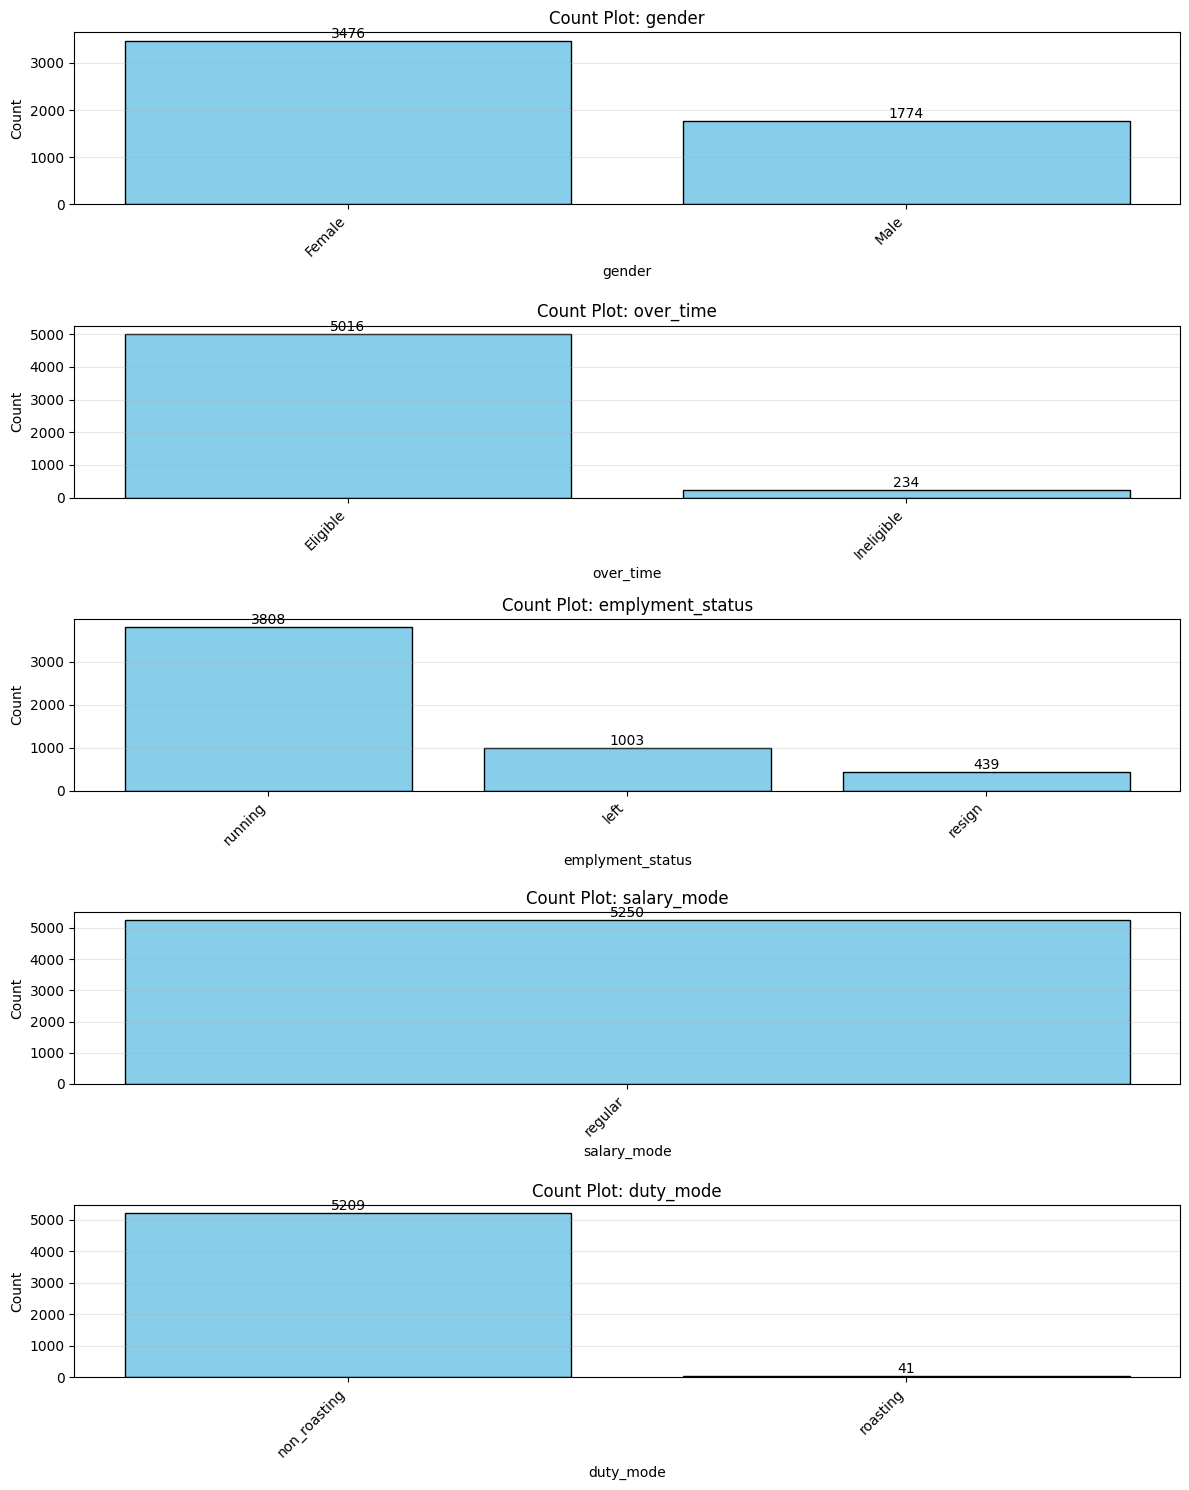

In [63]:
import matplotlib.pyplot as plt

# Count plots for categorical variables
categorical_cols = ['gender', 'over_time', 'emplyment_status',
                    'salary_mode', 'duty_mode']

fig, axes = plt.subplots(len(categorical_cols), 1,
                         figsize=(12, len(categorical_cols)*3))

for idx, col in enumerate(categorical_cols):
    if len(categorical_cols) == 1:
        ax = axes
    else:
        ax = axes[idx]

    value_counts = df_merged[col].value_counts()
    ax.bar(range(len(value_counts)), value_counts.values,
           color='skyblue', edgecolor='black')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax.set_title(f'Count Plot: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Save the figure
plt.savefig('categorical_count_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


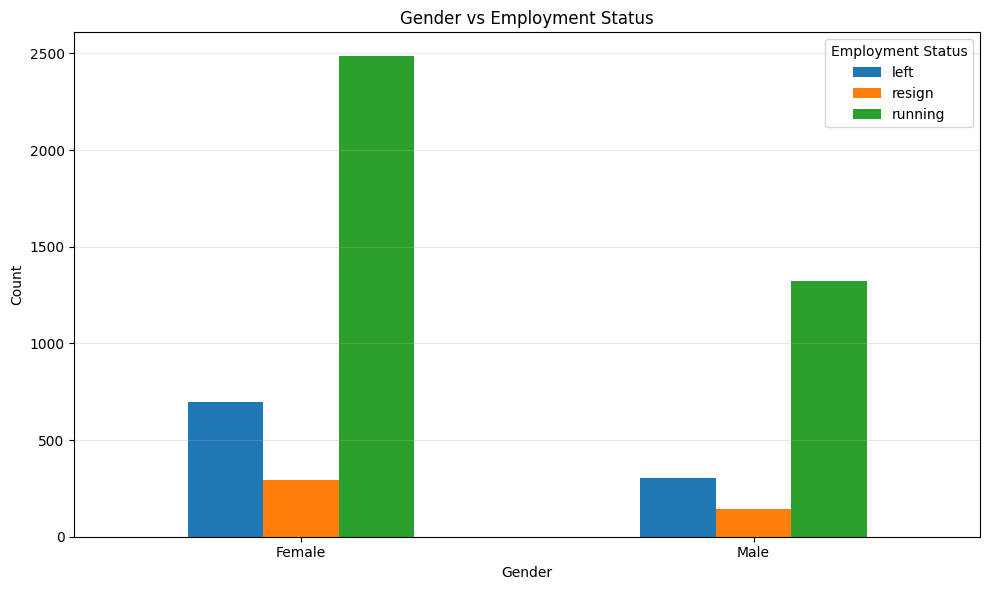

In [64]:
# Visualize crosstab
ct = pd.crosstab(df_merged['gender'], df_merged['emplyment_status'])
ct.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Gender vs Employment Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Employment Status')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('gender_employment_crosstab.png', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5250 entries, 0 to 5260
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5250 non-null   int64  
 1   gender            5250 non-null   object 
 2   over_time         5250 non-null   object 
 3   emplyment_status  5250 non-null   object 
 4   grade             5250 non-null   float64
 5   gross_salary      5250 non-null   int64  
 6   branch_id         5250 non-null   int64  
 7   department_id     5250 non-null   int64  
 8   salary_mode       5250 non-null   object 
 9   duty_mode         5250 non-null   object 
 10  skills_list       5250 non-null   object 
 11  designation_id    5250 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 533.2+ KB


In [66]:
df_merged.describe()

,id,grade,gross_salary,branch_id,department_id,designation_id
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,11472.313905,2.659238,15283.304952,8.457333,149.166667,529.850667
std,5122.650330,0.684223,3712.642124,4.280438,80.367750,296.059320
min,19.000000,1.000000,8450.000000,2.000000,5.000000,19.000000
25%,7785.250000,2.000000,14300.000000,5.000000,96.000000,314.000000
50%,12662.000000,3.000000,14549.000000,11.000000,179.000000,644.000000
75%,15927.750000,3.000000,15337.000000,11.000000,196.000000,679.000000
max,18455.000000,4.000000,65600.000000,20.000000,421.000000,1600.000000


In [67]:
df_merged.shape

(5250, 12)

In [68]:
df_merged

,id,gender,over_time,emplyment_status,grade,gross_salary,branch_id,department_id,salary_mode,duty_mode,skills_list,designation_id
0,19,Male,Ineligible,running,3.0,24272,3,5,regular,non_roasting,[294.0],60
1,103,Female,Eligible,running,3.0,14549,2,39,regular,non_roasting,"[86.0, 86.0]",125
2,104,Female,Eligible,running,3.0,14549,2,39,regular,non_roasting,"[86.0, 86.0]",125
3,105,Female,Eligible,resign,2.0,14273,2,39,regular,non_roasting,"[86.0, 86.0, 86.0, 86.0, 86.0]",124
4,109,Female,Eligible,running,2.0,15337,2,39,regular,non_roasting,"[86.0, 86.0]",124
...,...,...,...,...,...,...,...,...,...,...,...,...
5256,18443,Male,Ineligible,running,3.0,26500,11,185,regular,non_roasting,[nan],645
5257,18451,Female,Eligible,running,2.0,14500,5,96,regular,non_roasting,"[15.0, 15.0, 8.0]",315
5258,18452,Female,Eligible,running,3.0,14000,5,96,regular,non_roasting,"[14.0, 14.0, 80.0]",314
5259,18454,Male,Eligible,running,2.0,15500,5,96,regular,non_roasting,"[11.0, 8.0, 12.0, 8.0, 252.0, 8.0]",315


In [69]:
df_merged['department_id'].unique()

array([  5,  39,   6,  52,   7, 406, 207,  96,  71, 204, 105, 407, 117,
        82, 156, 208, 194, 197, 183, 202, 179, 173, 209, 191, 203, 201,
       196, 199, 167, 177, 174, 182, 184, 421, 193, 200, 185, 169, 195,
       186, 198, 223, 118, 165, 206, 268, 269, 270, 271, 266, 267, 272,
       273, 274, 275, 417, 301, 302, 280, 281, 408, 277, 308, 311, 178,
       401, 192,  41,  92])

In [70]:
df_merged['designation_id'].unique()

array([  60,  125,  124,   20,  329,   43,  730,  914,  544,  277, 1471,
        328,   46,   44,  314,   21,  315,  316,   19,  175,  336,  341,
        326, 1479,  364, 1480, 1238,  373,  372,  371,  761,  397,  912,
        236,  524,  279,  126, 1014,  274,  792,  793, 1508,  663,  670,
        681,  661,  898,  900,  662,  671, 1239,  897,  702,  623,  599,
        727,  653,  639,  640, 1453,  709,  698,  679, 1287, 1227,  690,
        689,  589,  703,  701,  610,  638, 1403,  637,  643, 1279,  633,
        624, 1590, 1504,  626,  658,  631,  628, 1589, 1592,  697,  659,
        692, 1505,  678,  677,  694,  704,  722,  611,  612, 1586, 1454,
        644,  706,  593,  660,  673,  675,  693,  674,  696,  645,  728,
        646,  587,  684, 1568,  713, 1164,  814,  654, 1594,  700,  899,
       1455, 1241,  895, 1501,  800,  632,  801,  896, 1283,  399,  857,
        600,  723,  321,  297,  669, 1600,  275,  303,  338,  313,   48,
        276,  268,  718,   23, 1009,  953,  952,  9

In [71]:
df_ml = df_merged[['grade','gross_salary','department_id','designation_id',
                   'skills_list']]

In [72]:
df_ml['skills_list']

,skills_list
0,[294.0]
1,"[86.0, 86.0]"
2,"[86.0, 86.0]"
3,"[86.0, 86.0, 86.0, 86.0, 86.0]"
4,"[86.0, 86.0]"
...,...
5256,[nan]
5257,"[15.0, 15.0, 8.0]"
5258,"[14.0, 14.0, 80.0]"
5259,"[11.0, 8.0, 12.0, 8.0, 252.0, 8.0]"


In [73]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

n = len(df_merged)

def random_date(start_year, end_year):
    start = datetime(start_year, 1, 1)
    end = datetime(end_year, 12, 31)
    return start + timedelta(days=random.randint(0, (end - start).days))

employees_df = pd.DataFrame({
    # --- PRIMARY / IDS ---
    "id": range(1, n + 1),
    "employee_id": [f"EMP{10000+i}" for i in range(n)],

    # --- AUTH / IDENTITY ---
    "username": [fake.unique.user_name() for _ in range(n)],
    "email": [fake.unique.email() for _ in range(n)],
    "password": [fake.password(length=12) for _ in range(n)],

    # --- PERSONAL INFO ---
    "first_name": [fake.first_name() for _ in range(n)],
    "last_name": [fake.last_name() for _ in range(n)],
    "phone": [fake.phone_number() for _ in range(n)],
    "address": [fake.address() for _ in range(n)],
    "gender": df_merged["gender"].values,
    "date_of_birth": [random_date(1975, 2000).date() for _ in range(n)],

    # --- ROLE / STATUS ---
    "role": [random.choice(["admin", "employee"]) for _ in range(n)],
    "status": ["active"] * n,

    # --- JOB / ORG ---
    "department": [fake.job() for _ in range(n)],
    "department_id": df_merged["department_id"].values,
    "designation": [fake.job() for _ in range(n)],
    "designation_id": df_merged["designation_id"].values,
    "position": [fake.job() for _ in range(n)],
    "grade": df_merged["grade"].values,

    # --- SKILLS & SALARY ---
    "skills": df_merged["skills_list"].astype(str).values,
    "salary": df_merged["gross_salary"].values,

    # --- DATES ---
    "hire_date": [random_date(2015, 2024).date() for _ in range(n)],
    "created_at": [datetime.now()] * n,
    "updated_at": [datetime.now()] * n
})

# SAVE CSV
employees_df.to_csv("employees_fake_data.csv", index=False)

print("employees_fake_data.csv generated successfully")


employees_fake_data.csv generated successfully


In [74]:
employees_df.head()

,id,employee_id,username,email,password,first_name,last_name,phone,address,gender,...,department_id,designation,designation_id,position,grade,skills,salary,hire_date,created_at,updated_at
0,1,EMP10000,palmerryan,samuelwells@example.net,ff0JDKFp%EjR,Carl,Johnson,(398)329-9703,"0189 Alexandria Island\nJessicaton, SC 04847",Male,...,5,IT technical support officer,60,Patent examiner,3.0,[294.0],24272,2020-07-28,2025-12-18 07:54:20.156284,2025-12-18 07:54:20.156296
1,2,EMP10001,zrogers,josephrichardson@example.com,JQWm25fwQ@62,Troy,Brown,289.721.6029,"7658 James Ports Apt. 678\nDunlapton, ME 72906",Female,...,39,Chief Operating Officer,125,"Engineer, automotive",3.0,"[86.0, 86.0]",14549,2023-09-07,2025-12-18 07:54:20.156284,2025-12-18 07:54:20.156296
2,3,EMP10002,robin66,joshua83@example.net,6GAp6G_h^J2K,Fernando,Fields,459-482-2037x839,43537 Michele Flats Suite 345\nEast Crystalber...,Female,...,39,Dietitian,125,"Solicitor, Scotland",3.0,"[86.0, 86.0]",14549,2017-09-27,2025-12-18 07:54:20.156284,2025-12-18 07:54:20.156296
3,4,EMP10003,nmitchell,michaelcraig@example.net,7TDRtQ8u@I+&,Joyce,Thompson,252.789.6837x4599,"425 Clark Manor\nLake Willieshire, IN 41371",Female,...,39,Biomedical scientist,124,Tax adviser,2.0,"[86.0, 86.0, 86.0, 86.0, 86.0]",14273,2022-09-06,2025-12-18 07:54:20.156284,2025-12-18 07:54:20.156296
4,5,EMP10004,anthonysoto,amoore@example.org,_7Ht(9$IcoA#,Mary,Morris,+1-600-898-2415,"5865 Melton Greens\nPort Henrymouth, MO 40315",Female,...,39,"Radiographer, therapeutic",124,Volunteer coordinator,2.0,"[86.0, 86.0]",15337,2021-02-19,2025-12-18 07:54:20.156284,2025-12-18 07:54:20.156296


In [75]:
employees_df.shape

(5250, 24)

In [76]:
!pip install faker

Encoding Summary:
Total columns: 149
Total rows: 5250

Column names:
['id', 'gross_salary', 'gender_encoded', 'grade_encoded', 'skill_8', 'skill_9', 'skill_10', 'skill_11', 'skill_12', 'skill_13', 'skill_14', 'skill_15', 'skill_16', 'skill_17', 'skill_18', 'skill_19', 'skill_20', 'skill_21', 'skill_22', 'skill_23', 'skill_24', 'skill_26', 'skill_28', 'skill_29', 'skill_31', 'skill_32', 'skill_44', 'skill_47', 'skill_51', 'skill_80', 'skill_81', 'skill_85', 'skill_86', 'skill_87', 'skill_88', 'skill_89', 'skill_90', 'skill_91', 'skill_92', 'skill_93', 'skill_94', 'skill_95', 'skill_97', 'skill_98', 'skill_99', 'skill_100', 'skill_102', 'skill_104', 'skill_109', 'skill_158', 'skill_163', 'skill_165', 'skill_166', 'skill_167', 'skill_168', 'skill_169', 'skill_171', 'skill_172', 'skill_173', 'skill_174', 'skill_176', 'skill_177', 'skill_178', 'skill_179', 'skill_182', 'skill_183', 'skill_186', 'skill_187', 'skill_188', 'skill_189', 'skill_204', 'skill_209', 'skill_225', 'skill_228', 'skill

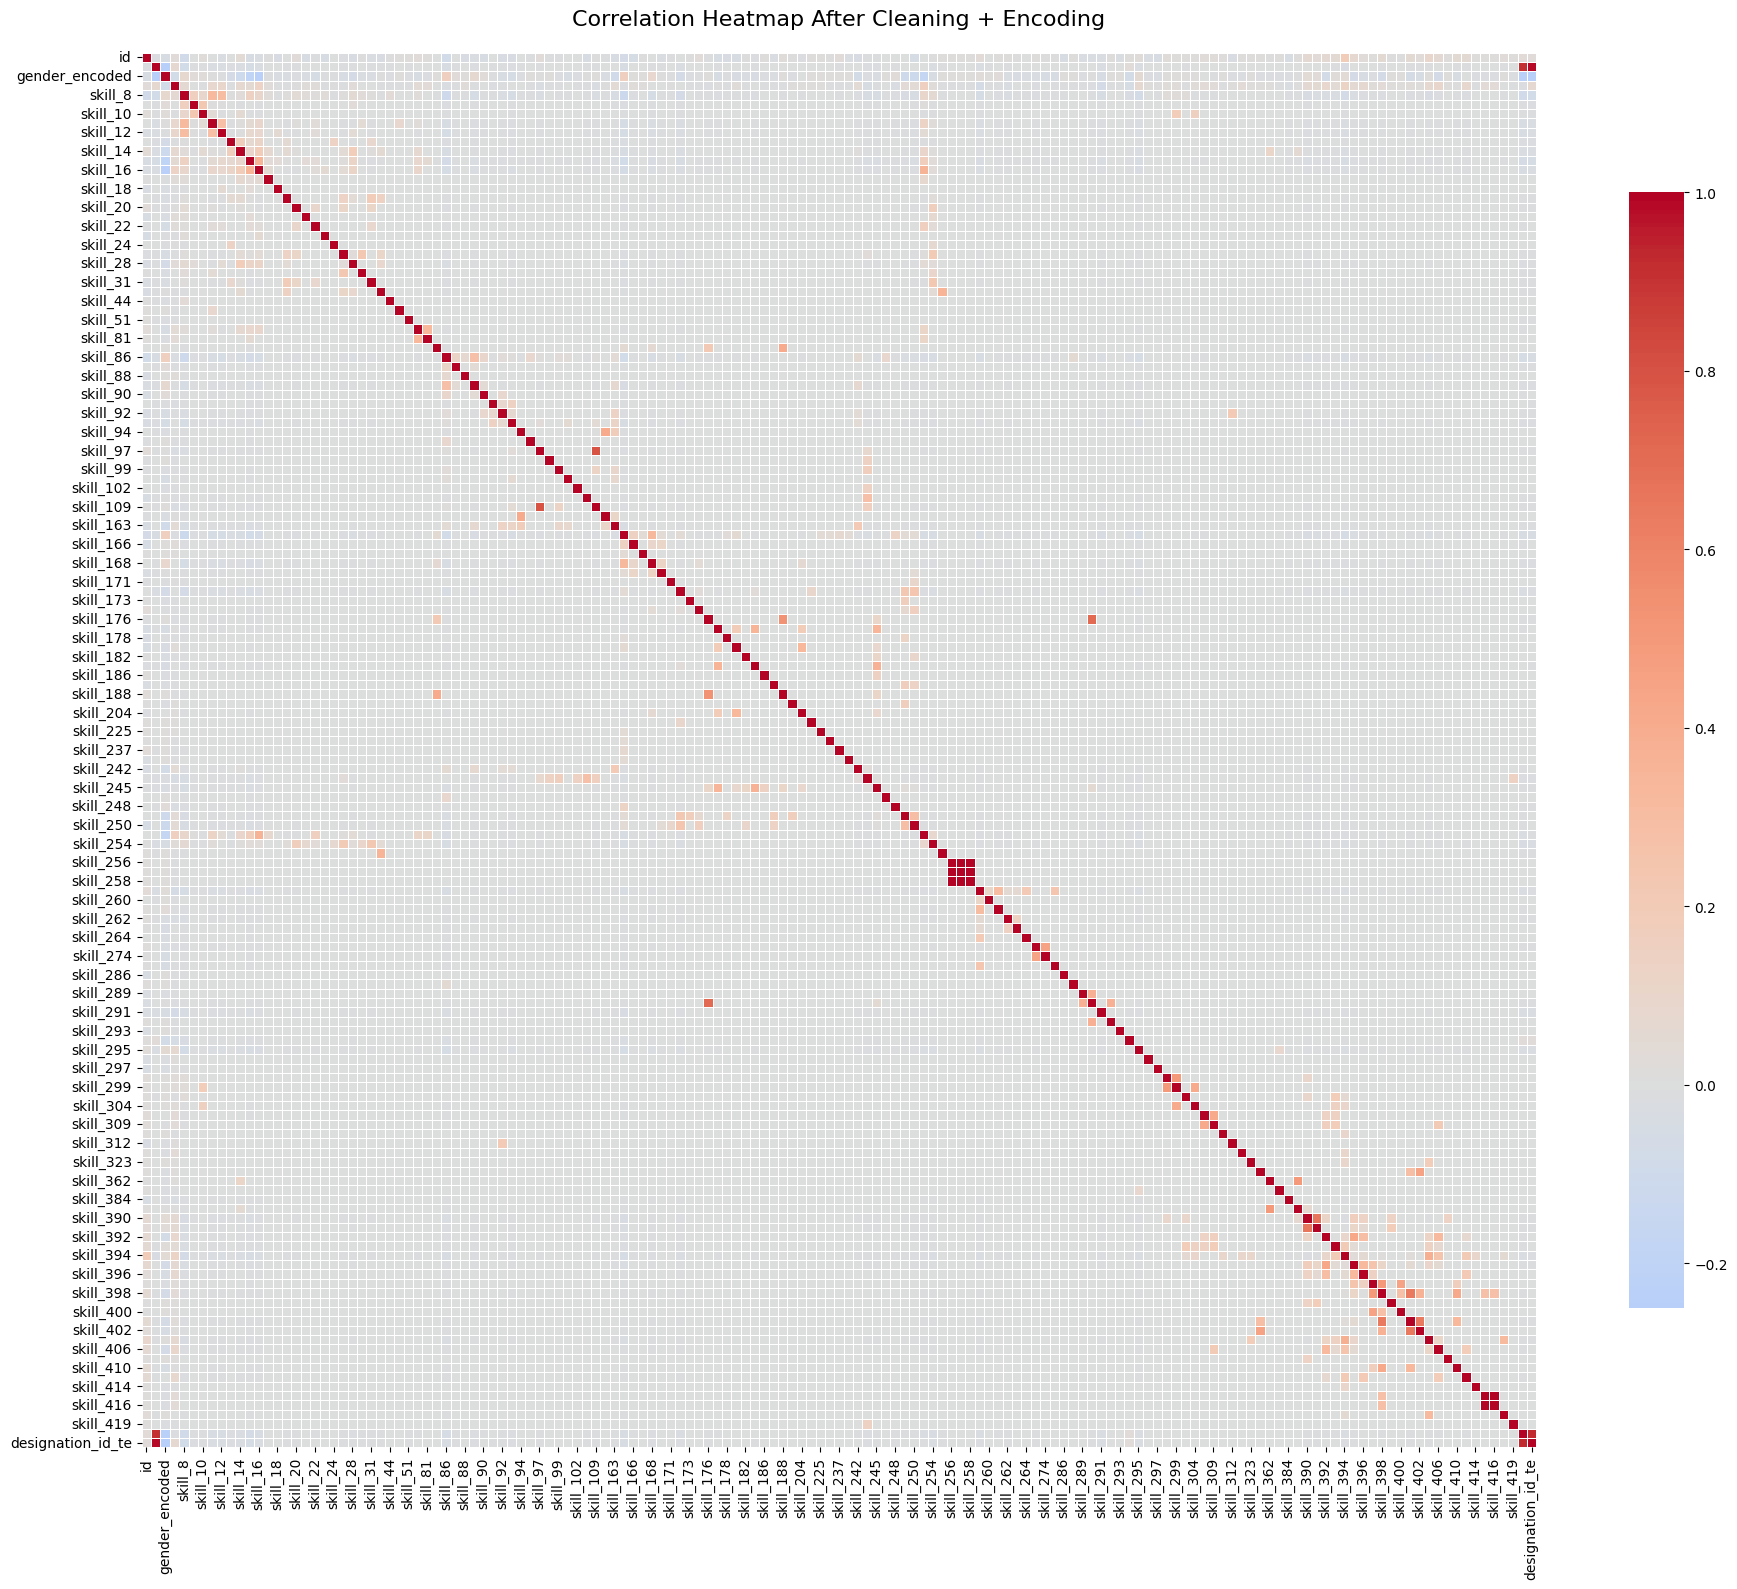


TOP 15 FEATURES CORRELATED WITH GROSS_SALARY:
gross_salary         1.000000
designation_id_te    0.986424
department_id_te     0.911639
grade_encoded        0.068099
skill_294            0.029041
skill_391            0.003656
skill_81             0.003037
skill_189            0.002338
skill_304            0.002177
skill_396            0.001613
skill_400            0.001527
skill_88             0.001221
skill_362            0.001122
skill_179            0.001024
skill_242            0.000881
skill_17             0.000742
Name: gross_salary, dtype: float64


In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer


df_selected = df_merged[['id', 'gender', 'grade',
                         'skills_list', 'department_id',
                         'designation_id', 'gross_salary']].copy()


df_selected['gender'] = df_selected['gender'].str.lower().str.strip()

gender_map = {
    'male': 0,
    'female': 1,
    'famale': 1,
    'femel': 1,
    'others': 2
}

df_selected['gender_encoded'] = df_selected['gender'].map(gender_map)

# remove raw gender column
df_selected = df_selected.drop(columns=['gender'])



df_selected['grade_encoded'] = df_selected['grade'].map({
    1: 4,  # Highest salary -> Highest value
    2: 3,
    3: 2,
    4: 1   # Lowest salary -> Lowest value
})

# Drop original grade column
df_selected = df_selected.drop(columns=['grade'])



def clean_skills(skill_list):
    if not isinstance(skill_list, list):
        return []

    cleaned = [skill for skill in skill_list if pd.notna(skill)]
    return list(set(cleaned))

df_selected['skills_list_cleaned'] = df_selected['skills_list'].apply(clean_skills)

# MultiLabelBinarizer handles lists of skills
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(df_selected['skills_list_cleaned'])

# Create dataframe with skill columns
skills_df = pd.DataFrame(
    skills_encoded,
    columns=[f'skill_{int(skill)}' for skill in mlb.classes_],
    index=df_selected.index
)

# Concatenate with main dataframe
df_encoded = pd.concat([df_selected.drop(columns=['skills_list', 'skills_list_cleaned']), skills_df], axis=1)


def target_encode(df, column, target='gross_salary'):
    means = df.groupby(column)[target].mean()
    return df[column].map(means)


df_encoded['department_id_te'] = target_encode(df_encoded, 'department_id')
df_encoded['designation_id_te'] = target_encode(df_encoded, 'designation_id')


df_encoded = df_encoded.drop(['department_id', 'designation_id'], axis=1)


print("Encoding Summary:")
print(f"Total columns: {df_encoded.shape[1]}")
print(f"Total rows: {df_encoded.shape[0]}")
print(f"\nColumn names:")
print(df_encoded.columns.tolist())
print(f"\nFirst few rows:")
print(df_encoded.head())


plt.figure(figsize=(20, 16))
correlation_matrix = df_encoded.corr()

# Plot heatmap (without annotations if too many columns)
if len(correlation_matrix.columns) > 30:
    sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
else:
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
                cmap='coolwarm', center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap After Cleaning + Encoding", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


print("\n" + "="*60)
print("TOP 15 FEATURES CORRELATED WITH GROSS_SALARY:")
print("="*60)
salary_corr = df_encoded.corr()['gross_salary'].sort_values(ascending=False)
print(salary_corr.head(16))  # 16 because gross_salary will be 1.0 with itself

In [78]:
df_encoded

,id,gross_salary,gender_encoded,grade_encoded,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,...,skill_407,skill_410,skill_413,skill_414,skill_415,skill_416,skill_417,skill_419,department_id_te,designation_id_te
0,19,24272,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16682.161290,24272.000000
1,103,14549,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14726.957935,14511.126374
2,104,14549,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14726.957935,14511.126374
3,105,14273,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14726.957935,15263.917722
4,109,15337,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14726.957935,15263.917722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5256,18443,26500,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27854.651515,25237.777778
5257,18451,14500,1,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14524.396552,14906.159509
5258,18452,14000,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14524.396552,14201.500730
5259,18454,15500,0,3,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,14524.396552,14906.159509


In [79]:
skill_cols = [col for col in df_encoded.columns if col.startswith("skill_")]


In [80]:
skill_cols

['skill_8',
 'skill_9',
 'skill_10',
 'skill_11',
 'skill_12',
 'skill_13',
 'skill_14',
 'skill_15',
 'skill_16',
 'skill_17',
 'skill_18',
 'skill_19',
 'skill_20',
 'skill_21',
 'skill_22',
 'skill_23',
 'skill_24',
 'skill_26',
 'skill_28',
 'skill_29',
 'skill_31',
 'skill_32',
 'skill_44',
 'skill_47',
 'skill_51',
 'skill_80',
 'skill_81',
 'skill_85',
 'skill_86',
 'skill_87',
 'skill_88',
 'skill_89',
 'skill_90',
 'skill_91',
 'skill_92',
 'skill_93',
 'skill_94',
 'skill_95',
 'skill_97',
 'skill_98',
 'skill_99',
 'skill_100',
 'skill_102',
 'skill_104',
 'skill_109',
 'skill_158',
 'skill_163',
 'skill_165',
 'skill_166',
 'skill_167',
 'skill_168',
 'skill_169',
 'skill_171',
 'skill_172',
 'skill_173',
 'skill_174',
 'skill_176',
 'skill_177',
 'skill_178',
 'skill_179',
 'skill_182',
 'skill_183',
 'skill_186',
 'skill_187',
 'skill_188',
 'skill_189',
 'skill_204',
 'skill_209',
 'skill_225',
 'skill_228',
 'skill_237',
 'skill_239',
 'skill_242',
 'skill_243',
 'skill

In [81]:
df_ml.columns

Index(['grade', 'gross_salary', 'department_id', 'designation_id',
       'skills_list'],
      dtype='object')

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
df_merged['designation_id'].value_counts()


,count
designation_id,
314,685
678,656
679,565
373,414
125,364
...,...
791,1
1560,1
323,1


In [84]:
df_ml.columns

Index(['grade', 'gross_salary', 'department_id', 'designation_id',
       'skills_list'],
      dtype='object')

In [85]:
df_encoded = df_ml.copy()

In [86]:
def clean_skills(skill_list):
    if not isinstance(skill_list, list):
        return []
    # Remove NaN values and duplicates
    cleaned = [skill for skill in skill_list if pd.notna(skill)]
    return list(set(cleaned))

df_ml['skills_list_cleaned'] = df_ml['skills_list'].apply(clean_skills)

In [87]:
# MultiLabelBinarizer
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(df_ml['skills_list_cleaned'])

# Create skill columns
skills_df = pd.DataFrame(
    skills_encoded,
    columns=[f'skill_{int(skill)}' for skill in mlb.classes_],
    index=df_ml.index
)

In [88]:
skills_df

,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,skill_15,skill_16,skill_17,...,skill_405,skill_406,skill_407,skill_410,skill_413,skill_414,skill_415,skill_416,skill_417,skill_419
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5257,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5258,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5259,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df_ml = pd.concat([df_ml.drop(columns=['skills_list', 'skills_list_cleaned']), skills_df], axis=1)

In [90]:
def target_encode(df, column, target='gross_salary'):
    means = df.groupby(column)[target].mean()
    return df[column].map(means)

df_ml['department_id_te'] = target_encode(df_ml, 'department_id')
df_ml['designation_id_te'] = target_encode(df_ml, 'designation_id')

In [91]:
df_ml

,grade,gross_salary,department_id,designation_id,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,...,skill_407,skill_410,skill_413,skill_414,skill_415,skill_416,skill_417,skill_419,department_id_te,designation_id_te
0,3.0,24272,5,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16682.161290,24272.000000
1,3.0,14549,39,125,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14726.957935,14511.126374
2,3.0,14549,39,125,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14726.957935,14511.126374
3,2.0,14273,39,124,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14726.957935,15263.917722
4,2.0,15337,39,124,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14726.957935,15263.917722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5256,3.0,26500,185,645,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27854.651515,25237.777778
5257,2.0,14500,96,315,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14524.396552,14906.159509
5258,3.0,14000,96,314,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14524.396552,14201.500730
5259,2.0,15500,96,315,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,14524.396552,14906.159509


In [92]:
X = df_ml.drop('gross_salary', axis=1)
y = df_ml['gross_salary']


In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [94]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=20),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}

In [95]:
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'=' * 60}")
    print(f"Training: {name}")
    print('=' * 60)

    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Model': model,
        'Predictions': y_test_pred
    }

    print(f"Train MAE: {train_mae:,.2f} | Test MAE: {test_mae:,.2f}")
    print(f"Train RMSE: {train_rmse:,.2f} | Test RMSE: {test_rmse:,.2f}")
    print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

    # Overfitting check
    overfit_gap = train_r2 - test_r2
    if overfit_gap > 0.15:
        print(f"  High overfitting (gap: {overfit_gap:.4f})")
    elif overfit_gap > 0.05:
        print(f"  Moderate overfitting (gap: {overfit_gap:.4f})")
    else:
        print(f"  Good generalization (gap: {overfit_gap:.4f})")


Training: Linear Regression
Train MAE: 389.93 | Test MAE: 409.33
Train RMSE: 589.15 | Test RMSE: 631.29
Train R²: 0.9766 | Test R²: 0.9586
  Good generalization (gap: 0.0179)

Training: Ridge Regression
Train MAE: 392.12 | Test MAE: 409.28
Train RMSE: 589.78 | Test RMSE: 630.89
Train R²: 0.9765 | Test R²: 0.9587
  Good generalization (gap: 0.0178)

Training: Lasso Regression
Train MAE: 398.64 | Test MAE: 413.62
Train RMSE: 595.33 | Test RMSE: 633.11
Train R²: 0.9761 | Test R²: 0.9584
  Good generalization (gap: 0.0177)

Training: Decision Tree
Train MAE: 357.71 | Test MAE: 445.26
Train RMSE: 564.93 | Test RMSE: 770.83
Train R²: 0.9785 | Test R²: 0.9383
  Good generalization (gap: 0.0401)

Training: Random Forest
Train MAE: 366.05 | Test MAE: 432.26
Train RMSE: 566.92 | Test RMSE: 710.89
Train R²: 0.9783 | Test R²: 0.9475
  Good generalization (gap: 0.0308)

Training: Gradient Boosting
Train MAE: 392.45 | Test MAE: 427.11
Train RMSE: 583.80 | Test RMSE: 698.21
Train R²: 0.9770 | Test R

In [96]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test MAE': [results[m]['Test MAE'] for m in results.keys()],
    'Test RMSE': [results[m]['Test RMSE'] for m in results.keys()],
    'Test R²': [results[m]['Test R²'] for m in results.keys()]
}).sort_values('Test MAE')

print("\nModel Performance Summary (sorted by Test MAE):")
print(comparison_df.to_string(index=False))


Model Performance Summary (sorted by Test MAE):
            Model   Test MAE  Test RMSE  Test R²
 Ridge Regression 409.279380 630.891601 0.958675
Linear Regression 409.325076 631.287443 0.958623
 Lasso Regression 413.624610 633.112424 0.958383
Gradient Boosting 427.114623 698.206571 0.949385
    Random Forest 432.259504 710.894312 0.947529
    Decision Tree 445.258099 770.829857 0.938309
         AdaBoost 523.305906 877.350253 0.920080


In [97]:
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['Model']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test MAE: {comparison_df.iloc[0]['Test MAE']:,.2f}")
print(f"   Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"   Prediction error: ±{comparison_df.iloc[0]['Test MAE']:,.0f} salary units")


🏆 BEST MODEL: Ridge Regression
   Test MAE: 409.28
   Test R²: 0.9587
   Prediction error: ±409 salary units


In [98]:
print("\n" + "="*60)
print("STEP 7: HYPERPARAMETER TUNING")
print("="*60)

if best_model_name == 'Random Forest':
    print("\nTuning Random Forest...")
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [15, 20, 25, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }

    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )

    print("Starting grid search... (this may take a few minutes)")
    grid_search.fit(X_train, y_train)

    print(f"\n✅ Best parameters: {grid_search.best_params_}")

    tuned_model = grid_search.best_estimator_
    y_test_pred_tuned = tuned_model.predict(X_test)

    tuned_mae = mean_absolute_error(y_test, y_test_pred_tuned)
    tuned_r2 = r2_score(y_test, y_test_pred_tuned)

    print(f"\n📊 Tuned Model Performance:")
    print(f"   Test MAE: {tuned_mae:,.2f} (baseline: {results[best_model_name]['Test MAE']:,.2f})")
    print(f"   Test R²: {tuned_r2:.4f} (baseline: {results[best_model_name]['Test R²']:.4f})")
    print(f"   Improvement: {results[best_model_name]['Test MAE'] - tuned_mae:,.2f} MAE reduction")

    if tuned_mae < results[best_model_name]['Test MAE']:
        best_model = tuned_model
        results[best_model_name]['Predictions'] = y_test_pred_tuned

elif best_model_name == 'Gradient Boosting':
    print("\nTuning Gradient Boosting...")
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )

    print("Starting grid search...")
    grid_search.fit(X_train, y_train)

    print(f"\n✅ Best parameters: {grid_search.best_params_}")

    tuned_model = grid_search.best_estimator_
    y_test_pred_tuned = tuned_model.predict(X_test)

    tuned_mae = mean_absolute_error(y_test, y_test_pred_tuned)
    tuned_r2 = r2_score(y_test, y_test_pred_tuned)

    print(f"\n📊 Tuned Model Performance:")
    print(f"   Test MAE: {tuned_mae:,.2f} (baseline: {results[best_model_name]['Test MAE']:,.2f})")
    print(f"   Test R²: {tuned_r2:.4f} (baseline: {results[best_model_name]['Test R²']:.4f})")
    print(f"   Improvement: {results[best_model_name]['Test MAE'] - tuned_mae:,.2f}")

    if tuned_mae < results[best_model_name]['Test MAE']:
        best_model = tuned_model
        results[best_model_name]['Predictions'] = y_test_pred_tuned

else:
    print(f"Hyperparameter tuning not implemented for {best_model_name}")


STEP 7: HYPERPARAMETER TUNING
Hyperparameter tuning not implemented for Ridge Regression


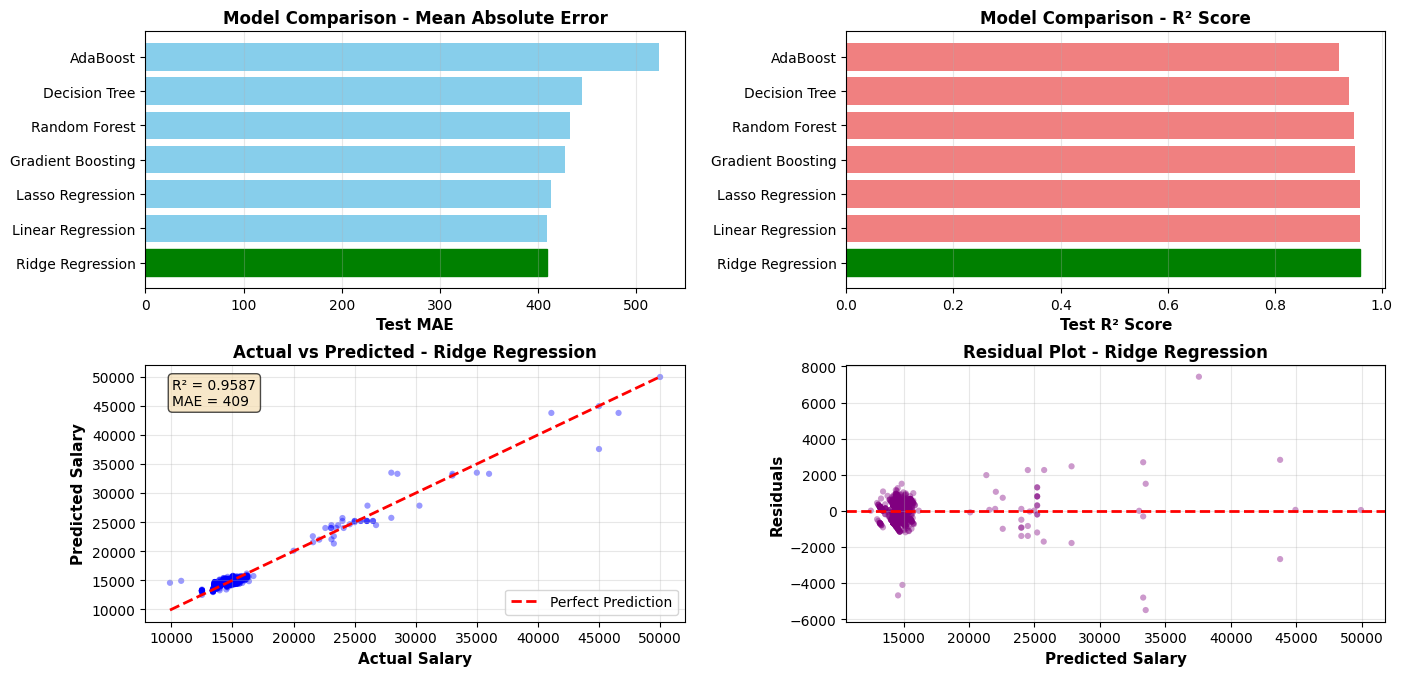

In [99]:
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Model Comparison - MAE
ax1 = fig.add_subplot(gs[0, 0])
comparison_sorted = comparison_df.sort_values('Test MAE', ascending=True)
bars = ax1.barh(comparison_sorted['Model'], comparison_sorted['Test MAE'], color='skyblue')
bars[0].set_color('green')
ax1.set_xlabel('Test MAE', fontsize=11, fontweight='bold')
ax1.set_title('Model Comparison - Mean Absolute Error', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 2. Model Comparison - R²
ax2 = fig.add_subplot(gs[0, 1])
comparison_sorted_r2 = comparison_df.sort_values('Test R²', ascending=False)
bars2 = ax2.barh(comparison_sorted_r2['Model'], comparison_sorted_r2['Test R²'], color='lightcoral')
bars2[0].set_color('green')
ax2.set_xlabel('Test R² Score', fontsize=11, fontweight='bold')
ax2.set_title('Model Comparison - R² Score', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. Actual vs Predicted
ax3 = fig.add_subplot(gs[1, 0])
y_pred_best = results[best_model_name]['Predictions']
ax3.scatter(y_test, y_pred_best, alpha=0.4, s=20, c='blue', edgecolors='none')
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Salary', fontsize=11, fontweight='bold')
ax3.set_ylabel('Predicted Salary', fontsize=11, fontweight='bold')
ax3.set_title(f'Actual vs Predicted - {best_model_name}', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)
r2_text = f"R² = {results[best_model_name]['Test R²']:.4f}\nMAE = {results[best_model_name]['Test MAE']:,.0f}"
ax3.text(0.05, 0.95, r2_text, transform=ax3.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# 4. Residual Plot
ax4 = fig.add_subplot(gs[1, 1])
residuals = y_test.values - y_pred_best
ax4.scatter(y_pred_best, residuals, alpha=0.4, s=20, c='purple', edgecolors='none')
ax4.axhline(y=0, color='r', linestyle='--', lw=2)
ax4.set_xlabel('Predicted Salary', fontsize=11, fontweight='bold')
ax4.set_ylabel('Residuals', fontsize=11, fontweight='bold')
ax4.set_title(f'Residual Plot - {best_model_name}', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

In [100]:
X_train.head()

,grade,department_id,designation_id,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,...,skill_407,skill_410,skill_413,skill_414,skill_415,skill_416,skill_417,skill_419,department_id_te,designation_id_te
378,2.0,96,315,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,14524.396552,14906.159509
4800,3.0,196,679,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14814.347150,14398.261947
3480,3.0,207,722,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23107.333333,22587.411765
2514,3.0,308,1051,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14798.090909,14661.981132
1586,4.0,197,681,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13198.142857,13198.142857


In [101]:
df_ml['department_id'].unique()

array([  5,  39,   6,  52,   7, 406, 207,  96,  71, 204, 105, 407, 117,
        82, 156, 208, 194, 197, 183, 202, 179, 173, 209, 191, 203, 201,
       196, 199, 167, 177, 174, 182, 184, 421, 193, 200, 185, 169, 195,
       186, 198, 223, 118, 165, 206, 268, 269, 270, 271, 266, 267, 272,
       273, 274, 275, 417, 301, 302, 280, 281, 408, 277, 308, 311, 178,
       401, 192,  41,  92])

In [102]:
import pickle
from google.colab import files

print("\n" + "="*60)
print("SAVING MODEL AND MAPPINGS FOR PRODUCTION")
print("="*60)

# 1. Save the trained model
with open('salary_prediction_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("✅ Model saved: salary_prediction_model.pkl")

# 2. Save department target encoding mapping
# FIXED: Group by original department_id, not the encoded values
# Also need to use df_ml (before dropping) or recreate from df_encoded
department_mapping = df_ml.groupby('department_id')['gross_salary'].mean().to_dict()
department_default = df_ml['gross_salary'].mean()  # Global mean as default

department_encoding = {
    'mapping': department_mapping,
    'default': department_default
}
with open('department_mapping.pkl', 'wb') as f:
    pickle.dump(department_encoding, f)
print(f"✅ Department mapping saved: {len(department_mapping)} departments")
print(f"   Default value for unseen departments: {department_default:.2f}")

# 3. Save designation target encoding mapping
# FIXED: Same correction here
designation_mapping = df_ml.groupby('designation_id')['gross_salary'].mean().to_dict()
designation_default = df_ml['gross_salary'].mean()  # Global mean as default

designation_encoding = {
    'mapping': designation_mapping,
    'default': designation_default
}
with open('designation_mapping.pkl', 'wb') as f:
    pickle.dump(designation_encoding, f)
print(f"✅ Designation mapping saved: {len(designation_mapping)} designations")
print(f"   Default value for unseen designations: {designation_default:.2f}")

# 4. Save MultiLabelBinarizer (skills encoder)
with open('skills_mlb.pkl', 'wb') as f:
    pickle.dump(mlb, f)
print(f"✅ Skills encoder saved: {len(mlb.classes_)} unique skills")

# 5. Save feature column order
feature_columns = X_train.columns.tolist()
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)
print(f"✅ Feature columns saved: {len(feature_columns)} features")

print("\n" + "="*60)
print("ALL FILES SAVED SUCCESSFULLY!")
print("="*60)

# Optional: Display sample mappings for verification
print("\n📋 Sample Department Mappings:")
for dept_id, encoded_val in list(department_mapping.items())[:5]:
    print(f"   {dept_id}: {encoded_val:.2f}")

print("\n📋 Sample Designation Mappings:")
for desig_id, encoded_val in list(designation_mapping.items())[:5]:
    print(f"   {desig_id}: {encoded_val:.2f}")


SAVING MODEL AND MAPPINGS FOR PRODUCTION
✅ Model saved: salary_prediction_model.pkl
✅ Department mapping saved: 69 departments
   Default value for unseen departments: 15283.30
✅ Designation mapping saved: 222 designations
   Default value for unseen designations: 15283.30
✅ Skills encoder saved: 143 unique skills
✅ Feature columns saved: 148 features

ALL FILES SAVED SUCCESSFULLY!

📋 Sample Department Mappings:
   5: 16682.16
   6: 14777.05
   7: 14312.69
   39: 14726.96
   41: 13500.00

📋 Sample Designation Mappings:
   19: 15720.72
   20: 15137.05
   21: 14245.51
   23: 13102.50
   36: 25000.00


In [103]:
import pickle
import numpy as np
import pandas as pd

print("\n" + "="*70)
print("TESTING SALARY PREDICTION MODEL - COMPREHENSIVE TEST")
print("="*70)

# =============================================================================
# LOAD ALL PICKLE FILES
# =============================================================================
print("\n📦 STEP 1: Loading all pickle files...")

try:
    model = pickle.load(open('salary_prediction_model.pkl', 'rb'))
    print("✅ Model loaded")

    dept_encoding = pickle.load(open('department_mapping.pkl', 'rb'))
    print("✅ Department mapping loaded")

    desig_encoding = pickle.load(open('designation_mapping.pkl', 'rb'))
    print("✅ Designation mapping loaded")

    mlb = pickle.load(open('skills_mlb.pkl', 'rb'))
    print("✅ Skills encoder (MLB) loaded")

    feature_columns = pickle.load(open('feature_columns.pkl', 'rb'))
    print("✅ Feature columns loaded")

    print("\n✅ All resources loaded successfully!")

except FileNotFoundError as e:
    print(f"\n❌ ERROR: Could not find pickle file - {e}")
    print("Please ensure all pickle files are in the current directory")
    exit()

# =============================================================================
# INSPECT LOADED DATA
# =============================================================================
print("\n" + "="*70)
print("📊 STEP 2: Inspecting loaded data structures")
print("="*70)

print(f"\n🔍 Model Information:")
print(f"   Type: {type(model).__name__}")
print(f"   Expected features: {len(feature_columns)}")

print(f"\n🔍 Department Encoding:")
if isinstance(dept_encoding, dict) and 'mapping' in dept_encoding:
    print(f"   Structure: ✅ Correct! Has 'mapping' and 'default' keys")
    print(f"   Number of departments: {len(dept_encoding['mapping'])}")
    print(f"   Default value: {dept_encoding['default']:.2f}")
    print(f"   Sample dept IDs: {list(dept_encoding['mapping'].keys())[:5]}")
    dept_map = dept_encoding['mapping']
    dept_default = dept_encoding['default']
else:
    print(f"   Structure: ⚠️ Old format - simple dict")
    print(f"   Number of departments: {len(dept_encoding)}")
    print(f"   Sample dept IDs: {list(dept_encoding.keys())[:5]}")
    dept_map = dept_encoding
    dept_default = np.mean(list(dept_encoding.values()))
    print(f"   Calculated default: {dept_default:.2f}")

print(f"\n🔍 Designation Encoding:")
if isinstance(desig_encoding, dict) and 'mapping' in desig_encoding:
    print(f"   Structure: ✅ Correct! Has 'mapping' and 'default' keys")
    print(f"   Number of designations: {len(desig_encoding['mapping'])}")
    print(f"   Default value: {desig_encoding['default']:.2f}")
    print(f"   Sample desig IDs: {list(desig_encoding['mapping'].keys())[:5]}")
    desig_map = desig_encoding['mapping']
    desig_default = desig_encoding['default']
else:
    print(f"   Structure: ⚠️ Old format - simple dict")
    print(f"   Number of designations: {len(desig_encoding)}")
    print(f"   Sample desig IDs: {list(desig_encoding.keys())[:5]}")
    desig_map = desig_encoding
    desig_default = np.mean(list(desig_encoding.values()))
    print(f"   Calculated default: {desig_default:.2f}")

print(f"\n🔍 Skills (MultiLabelBinarizer):")
print(f"   Total unique skills: {len(mlb.classes_)}")
print(f"   Skill data type: {type(mlb.classes_[0])}")
print(f"   Sample skills (first 20): {list(mlb.classes_[:20])}")

print(f"\n🔍 Feature Columns:")
print(f"   Total features: {len(feature_columns)}")
print(f"   First 10 features: {feature_columns[:10]}")

# Check which features are present
has_grade = 'grade' in feature_columns
has_dept_id = 'department_id' in feature_columns
has_desig_id = 'designation_id' in feature_columns
has_dept_te = 'department_id_te' in feature_columns
has_desig_te = 'designation_id_te' in feature_columns

print(f"\n🔍 Feature Analysis:")
print(f"   'grade' present: {'✅' if has_grade else '❌'}")
print(f"   'department_id' present: {'✅' if has_dept_id else '❌'}")
print(f"   'designation_id' present: {'✅' if has_desig_id else '❌'}")
print(f"   'department_id_te' present: {'✅' if has_dept_te else '❌'}")
print(f"   'designation_id_te' present: {'✅' if has_desig_te else '❌'}")

# =============================================================================
# PREDICTION FUNCTION
# =============================================================================
def prepare_input_for_prediction(skills_list, department_id, designation_id, grade=None):
    """
    Converts raw user inputs into a single-row dataframe with all required features.

    Args:
        skills_list: list of strings (e.g., ["8", "15"])
        department_id: int or string
        designation_id: int or string
        grade: int (1-4) - only if grade feature exists in model

    Returns:
        DataFrame with all features ready for prediction
    """

    # Convert skills to float to match MLB classes (CRITICAL FIX!)
    skills_list_float = [float(skill) for skill in skills_list if skill]

    # Encode skills - returns binary array
    skills_binary = mlb.transform([skills_list_float])[0]

    # Encode department (use default if unknown)
    dept_te = dept_map.get(department_id, dept_default)

    # Encode designation (use default if unknown)
    desig_te = desig_map.get(designation_id, desig_default)

    # Build feature dictionary
    data_dict = {}

    # Add grade if it exists in features
    if has_grade and grade is not None:
        data_dict['grade'] = grade

    # Add department_id if it exists (original ID, not encoded)
    if has_dept_id:
        data_dict['department_id'] = department_id

    # Add designation_id if it exists (original ID, not encoded)
    if has_desig_id:
        data_dict['designation_id'] = designation_id

    # Add target-encoded versions if they exist
    if has_dept_te:
        data_dict['department_id_te'] = dept_te

    if has_desig_te:
        data_dict['designation_id_te'] = desig_te

    # Add all skill columns
    for idx, skill_name in enumerate(mlb.classes_):
        # Convert float to int for column name
        skill_col = f"skill_{int(skill_name)}"
        data_dict[skill_col] = int(skills_binary[idx])

    # Convert to DataFrame
    df_input = pd.DataFrame([data_dict])

    # Reindex to match training feature columns (fill missing with 0)
    df_input = df_input.reindex(columns=feature_columns, fill_value=0)

    return df_input, dept_te, desig_te, skills_binary

# =============================================================================
# TEST CASES
# =============================================================================
print("\n" + "="*70)
print("🧪 STEP 3: Running test cases")
print("="*70)

# Get sample dept and desig IDs from the mappings
sample_dept_ids = list(dept_map.keys())[:3] if dept_map else [24, 25, 26]
sample_desig_ids = list(desig_map.keys())[:3] if desig_map else [7, 8, 9]

# Define test cases
test_cases = [
    {
        "name": "Test Case 1: Known Department & Designation",
        "department_id": sample_dept_ids[0],
        "designation_id": sample_desig_ids[0],
        "grade": 2,
        "skills_list": ["8", "15"]
    },
    {
        "name": "Test Case 2: Different Grade, More Skills",
        "department_id": sample_dept_ids[1] if len(sample_dept_ids) > 1 else sample_dept_ids[0],
        "designation_id": sample_desig_ids[1] if len(sample_desig_ids) > 1 else sample_desig_ids[0],
        "grade": 4,
        "skills_list": ["8", "15", "23", "45"]
    },
    {
        "name": "Test Case 3: UNKNOWN Department (should use default)",
        "department_id": 99999,  # Unknown department
        "designation_id": sample_desig_ids[0],
        "grade": 3,
        "skills_list": ["8"]
    },
    {
        "name": "Test Case 4: UNKNOWN Designation (should use default)",
        "department_id": sample_dept_ids[0],
        "designation_id": 99999,  # Unknown designation
        "grade": 1,
        "skills_list": ["15", "23"]
    },
    {
        "name": "Test Case 5: No Skills",
        "department_id": sample_dept_ids[0],
        "designation_id": sample_desig_ids[0],
        "grade": 2,
        "skills_list": []
    },
    {
        "name": "Test Case 6: Skills that don't exist in training",
        "department_id": sample_dept_ids[0],
        "designation_id": sample_desig_ids[0],
        "grade": 3,
        "skills_list": ["8", "99999"]  # 99999 doesn't exist
    }
]

# Run predictions on all test cases
for i, test in enumerate(test_cases, 1):
    print(f"\n{'='*70}")
    print(f"🧪 {test['name']}")
    print(f"{'='*70}")

    print(f"\n📝 Input:")
    print(f"   Department ID: {test['department_id']}")
    print(f"   Designation ID: {test['designation_id']}")
    if has_grade:
        print(f"   Grade: {test['grade']}")
    print(f"   Skills: {test['skills_list']}")

    try:
        # Prepare input
        X_input, dept_encoded, desig_encoded, skills_binary = prepare_input_for_prediction(
            skills_list=test['skills_list'],
            department_id=test['department_id'],
            designation_id=test['designation_id'],
            grade=test['grade'] if has_grade else None
        )

        print(f"\n🔢 Encoded Values:")
        print(f"   Department encoded: {dept_encoded:.2f}")
        print(f"   Designation encoded: {desig_encoded:.2f}")

        # Check if defaults were used
        if test['department_id'] not in dept_map:
            print(f"   ⚠️ Unknown dept - used default value")
        if test['designation_id'] not in desig_map:
            print(f"   ⚠️ Unknown desig - used default value")

        # Count active skills from the binary array
        active_skills_count = int(skills_binary.sum())
        print(f"   Active skills: {active_skills_count}")

        # Show which skills are active
        if active_skills_count > 0:
            active_skill_names = [int(mlb.classes_[i]) for i, val in enumerate(skills_binary) if val == 1]
            print(f"   Active skill IDs: {active_skill_names}")

        print(f"\n📊 Prepared Input Shape: {X_input.shape}")
        print(f"   Sample features: {dict(list(X_input.iloc[0].items())[:5])}")

        # Make prediction
        pred_salary = model.predict(X_input)[0]

        print(f"\n💰 PREDICTION RESULT:")
        print(f"   ✅ Predicted Salary: ${pred_salary:,.2f}")

    except Exception as e:
        print(f"\n❌ PREDICTION FAILED!")
        print(f"   Error: {str(e)}")
        import traceback
        print(f"\n   Full traceback:")
        traceback.print_exc()

# =============================================================================
# VALIDATION SUMMARY
# =============================================================================
print("\n" + "="*70)
print("📋 VALIDATION SUMMARY")
print("="*70)

validation_checks = []

# Check encoding structure
if isinstance(dept_encoding, dict) and 'mapping' in dept_encoding:
    validation_checks.append("✅ Department encoding: Correct structure")
else:
    validation_checks.append("⚠️ Department encoding: Old structure (still works, but not optimal)")

if isinstance(desig_encoding, dict) and 'mapping' in desig_encoding:
    validation_checks.append("✅ Designation encoding: Correct structure")
else:
    validation_checks.append("⚠️ Designation encoding: Old structure (still works, but not optimal)")

validation_checks.append(f"✅ Skills encoder: {len(mlb.classes_)} unique skills")
validation_checks.append(f"✅ Feature columns: {len(feature_columns)} features")
validation_checks.append(f"✅ Model: {type(model).__name__}")

print("\n" + "\n".join(validation_checks))

print("\n" + "="*70)
print("✅ TESTING COMPLETE!")
print("="*70)


TESTING SALARY PREDICTION MODEL - COMPREHENSIVE TEST

📦 STEP 1: Loading all pickle files...
✅ Model loaded
✅ Department mapping loaded
✅ Designation mapping loaded
✅ Skills encoder (MLB) loaded
✅ Feature columns loaded

✅ All resources loaded successfully!

📊 STEP 2: Inspecting loaded data structures

🔍 Model Information:
   Type: Ridge
   Expected features: 148

🔍 Department Encoding:
   Structure: ✅ Correct! Has 'mapping' and 'default' keys
   Number of departments: 69
   Default value: 15283.30
   Sample dept IDs: [5, 6, 7, 39, 41]

🔍 Designation Encoding:
   Structure: ✅ Correct! Has 'mapping' and 'default' keys
   Number of designations: 222
   Default value: 15283.30
   Sample desig IDs: [19, 20, 21, 23, 36]

🔍 Skills (MultiLabelBinarizer):
   Total unique skills: 143
   Skill data type: <class 'float'>
   Sample skills (first 20): [8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 26.0, 28.0, 29.0]

🔍 Feature Columns:
   Total f